In [2]:
#Dependencies

import math
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [3]:
#Ticker + Data

ticker = 'CRM' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2018-1-1')['Adj Close']

In [4]:
#Deltas
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,CRM
Date,
2018-11-06,-0.011062
2018-11-07,0.056880
2018-11-08,0.000564
2018-11-09,-0.035514
2018-11-12,-0.048024


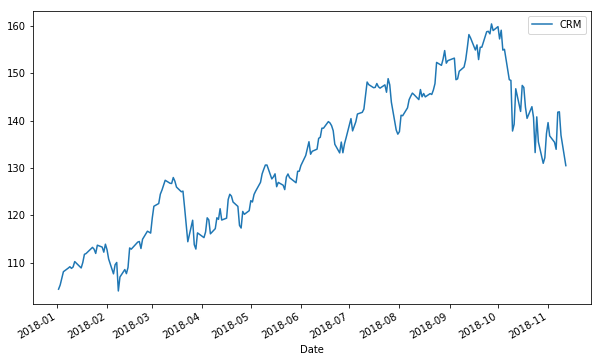

In [5]:
data.plot(figsize=(10, 6));

In [6]:
#Delta_Mean

mu = log_returns.mean()
print(mu)

CRM    0.001023
dtype: float64


In [7]:
#Delta_Variance

stdsquare = log_returns.var()
print(stdsquare)

CRM    0.000352
dtype: float64


In [8]:
#Drift

drift = mu - (0.5 * stdsquare)
print(drift)

CRM    0.000847
dtype: float64


In [9]:
#Delta_Standard Deviation

std = log_returns.std()
print(std)

CRM    0.018758
dtype: float64


In [10]:
#Checking the type Drift is stored as

type(drift)

pandas.core.series.Series

In [11]:
#Checking the type std is stored as
type(std)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00084722])

In [13]:
drift.values

array([0.00084722])

In [13]:
std.values

array([0.01875794])

In [14]:
#Random Variable
#97.5% Confidence interval.

z = norm.ppf(0.975)
print(z)

1.959963984540054


In [15]:
#Randomization wrt a 10x2 matrix

r = np.random.rand(10, 2)
r

array([[0.07484163, 0.43977691],
       [0.86636408, 0.92381866],
       [0.2229584 , 0.40632595],
       [0.59125085, 0.07671847],
       [0.5043819 , 0.77248403],
       [0.39317186, 0.51285835],
       [0.24508761, 0.00481946],
       [0.25715899, 0.42204066],
       [0.17976614, 0.4863629 ],
       [0.09672989, 0.46945273]])

In [16]:
#Converting the Randomization to in terms of Z score

norm.ppf(r)

array([[-1.44065117, -0.15153486],
       [ 1.10936713,  1.43123568],
       [-0.76223996, -0.23700631],
       [ 0.2307638 , -1.42749611],
       [ 0.01098402,  0.74705238],
       [-0.27106152,  0.03223667],
       [-0.69003018, -2.58852079],
       [-0.65212895, -0.19667571],
       [-0.9162567 , -0.03418981],
       [-1.30041206, -0.07664563]])

In [17]:
#Our final Z conversion

Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.280691  , -2.07794416],
       [ 0.44384945,  1.93293334],
       [ 0.55739808,  0.15570156],
       [ 0.5634881 ,  1.2455629 ],
       [-1.94167812,  0.56035116],
       [-0.90312647,  1.38886211],
       [-0.94098431, -0.33434955],
       [ 0.74096156,  1.88025937],
       [-1.52862722, -0.43833106],
       [ 0.80661317,  0.23383053]])

In [18]:
#Predicting the next thousand days and creating 10 timelines.

days = 1000
timelines = 10

In [19]:
#Our Daily Returns: Creating a 1000x10 array.

daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(days, timelines)))
print(daily_returns)

[[1.00418415 0.96641801 0.97584402 ... 0.99338798 0.97353304 1.02065444]
 [1.03378801 1.03382014 0.9770711  ... 0.97240219 1.00715144 0.95542106]
 [1.00884242 1.00738671 0.99299851 ... 1.00637632 1.01365602 0.9942931 ]
 ...
 [0.99407695 1.00646256 0.99413796 ... 1.01631263 1.01062296 0.98349685]
 [0.99988075 0.99323348 1.01446581 ... 1.00147948 0.98581647 1.01141085]
 [1.02308364 0.99191341 0.99859447 ... 1.0117903  1.01488864 1.01942218]]


In [20]:
#The first stock price in our list i.e. the last in our data set; this is since we start from the current date not from the last.

S_0 = data.iloc[-1]
print(S_0)

CRM    130.5
Name: 2018-11-12 00:00:00, dtype: float64


In [21]:
#The list of prices
#zeros_like creates an array of the same dimensions as an existing array full of zeros.

list_of_prices = np.zeros_like(daily_returns)
print(list_of_prices)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
list_of_prices[0] = S_0
list_of_prices

array([[130.5, 130.5, 130.5, ..., 130.5, 130.5, 130.5],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [23]:
for i in range(1, days):
    list_of_prices[i] = list_of_prices[i - 1] * daily_returns[i]

In [24]:
list_of_prices

array([[130.5       , 130.5       , 130.5       , ..., 130.5       ,
        130.5       , 130.5       ],
       [134.90933581, 134.91352882, 127.50777867, ..., 126.89848585,
        131.43326332, 124.68244787],
       [136.10226038, 135.91009632, 126.61503378, ..., 127.70763088,
        133.22811799, 123.9708972 ],
       ...,
       [498.61279228, 166.97742222, 250.77353779, ..., 153.98576454,
        565.90090469, 953.78978455],
       [498.55333284, 165.84756578, 254.40117995, ..., 154.21358284,
        557.87442985, 964.67333524],
       [510.06175747, 164.50642495, 254.04361066, ..., 156.0318072 ,
        566.18041919, 983.40939325]])

In [1]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,12))
plt.plot(list_of_prices)
plt.savefig("Figures/Figure_1.png")
plt.show()

NameError: name 'plt' is not defined